## NEURAL NETWORKS AND DEEP LEARNING
### Time Series
### Name:
### Course:

In [3]:
# import the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import warnings
warnings.filterwarnings('ignore')

2023-11-19 00:59:44.483390: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-19 00:59:45.483674: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 00:59:45.483716: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 00:59:45.488216: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 00:59:45.939796: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-19 00:59:45.942920: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [4]:
# Load dataset
train_df = pd.read_csv('lsst-train.csv')
test_df = pd.read_csv('lsst-test.csv')

In [5]:
train_df.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
0,2.57770,-1.18830,-4.98950,-6.4301,-4.6503,-1.02450,1.90420,2.48850,1.360500,0.90286,...,22.36600,-24.7480,-34.21500,7.7464,-5.8332,-0.71757,8.16160,-29.6940,-27.5700,c-90
1,6.67580,22.54300,44.02700,66.9610,86.0820,96.80400,96.76000,86.49400,69.094000,48.97100,...,19.26700,28.5110,0.97578,-28.0270,-18.0720,-4.00020,-43.07500,-4.7283,-43.0070,c-15
2,0.37554,-3.10860,-0.26009,3.2281,-1.9951,0.12797,0.25844,-0.25394,-0.091828,2.41440,...,-4.02610,14.5270,50.00500,-13.8860,3.3589,5.00450,-0.47256,-2.7713,1.9379,c-42
3,0.51852,0.12078,1.53240,5.5783,11.5340,17.01300,18.97100,15.38700,6.685500,-4.07800,...,23.24700,31.9850,26.62100,-12.2560,3.4805,23.80500,-32.36400,-15.1610,-14.4500,c-16
4,1.47150,1.44510,2.91330,1.0015,-1.2503,1.55160,1.73170,0.47796,0.539860,-1.71690,...,-0.18477,3.8533,-5.80000,1.4909,2.7581,-3.16650,-0.30058,6.6334,7.3427,c-67


In [6]:
test_df.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-27,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36
0,25.575000,25.5650,6.8052,-26.012,-55.1290,-62.0750,-43.3400,-14.26500,4.03600,2.8128,...,114.9600,116.3700,69.0540,11.8250,29.5960,55.14500,1.0701,-31.4420,20.914,39.9590
1,2.432400,10.4920,16.6900,14.609,3.8112,-8.9224,-15.1370,-11.82400,-3.60240,2.0792,...,16.7950,3.3646,5.7902,52.7540,-19.5210,-9.35210,63.4920,-17.8800,-40.938,6.2865
2,-0.166710,-1.0756,-0.8531,1.626,-1.8959,2.4717,-0.2629,-1.43750,0.89766,-2.4570,...,-3.3971,-8.2973,8.8071,-3.6586,-6.4716,0.87079,2.6530,2.2138,-1.323,-2.1806
3,-4.800300,-3.5558,-5.2497,-10.011,-10.9800,-3.5785,4.9622,2.28200,-11.07200,-17.1180,...,2.9662,-6.1161,-34.6170,-96.5080,-94.9050,-8.84960,48.7190,-15.2810,-15.786,34.8360
4,-0.048579,-11.9320,-25.6890,-35.259,-36.0600,-27.6460,-13.9240,-0.79703,7.31190,9.8219,...,63.1690,64.7760,53.0120,-83.1160,-50.6480,79.74300,-16.5700,74.2040,72.036,100.2200


In [7]:
# Preprocess data
# Convert the target column to categorical integer labels
class_mapping = {label: idx for idx, label in enumerate(train_df['target'].unique())}
train_df['target'] = train_df['target'].map(class_mapping)

In [8]:
# Separate features and target
X_train = train_df.drop('target', axis=1).values
y_train = train_df['target'].values

In [10]:
# Reshape for the model input
X_train_reshaped = X_train.reshape((-1, 6, 36))
X_test = test_df.values
X_test_reshaped = X_test.reshape((-1, 6, 36))
normalizer = tf.keras.layers.Normalization(axis=-1)
# Adapt the normalizer with the correct reshaped data
normalizer.adapt(X_train_reshaped)

In [11]:
input_shape = X_train_reshaped.shape[1:]
num_classes = len(class_mapping)

In [12]:
# Adapt the normalizer to the reshaped data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train_reshaped)

# Model 1: LSTM with Dropout
model_1 = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history_1 = model_1.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=0)

# Make predictions
predictions_1 = model_1.predict(X_test_reshaped)

# Prepare submission DataFrame
submission_df_1 = pd.DataFrame(predictions_1, columns=['class_' + str(i) for i in range(num_classes)])
submission_df_1.insert(0, 'object_id', test_df.index)
submission_df_1.to_csv('submission_1.csv', index=False)

45/45 [==============================] - 1s 4ms/step


In [14]:
# Model 2: More layers, more dropouts
model_2 = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
history_2 = model_2.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=0)

# Make predictions
predictions_2 = model_2.predict(X_test_reshaped)

# Prepare submission DataFrame
submission_df_2 = pd.DataFrame(predictions_2, columns=['class_' + str(i) for i in range(num_classes)])
submission_df_2.insert(0, 'object_id', test_df.index)
submission_df_2.to_csv('submission_2.csv', index=False)

45/45 [==============================] - 1s 8ms/step


In [16]:
# Model 3: GRU with BatchNormalization
model_3 = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GRU(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history_3 = model_3.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=0)

# Make predictions
predictions_3 = model_3.predict(X_test_reshaped)

# Prepare submission DataFrame
submission_df_3 = pd.DataFrame(predictions_3, columns=['class_' + str(i) for i in range(num_classes)])
submission_df_3.insert(0, 'object_id', test_df.index)
submission_df_3.to_csv('submission_3.csv', index=False)

45/45 [==============================] - 1s 5ms/step


In [18]:
# Model 4: Bidirectional LSTM
model_4 = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
history_4 = model_4.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=0)

# Make predictions
predictions_4 = model_4.predict(X_test_reshaped)

# Prepare submission DataFrame
submission_df_4 = pd.DataFrame(predictions_4, columns=['class_' + str(i) for i in range(num_classes)])
submission_df_4.insert(0, 'object_id', test_df.index)
submission_df_4.to_csv('submission_4.csv', index=False)

45/45 [==============================] - 1s 4ms/step


In [20]:
# Model 5: Convolutional Neural Network and LSTM
model_5 = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model
history_5 = model_5.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=0)

# Make predictions
predictions_5 = model_5.predict(X_test_reshaped)

# Prepare submission DataFrame
submission_df_5 = pd.DataFrame(predictions_5, columns=['class_' + str(i) for i in range(num_classes)])
submission_df_5.insert(0, 'object_id', test_df.index)
submission_df_5.to_csv('submission_5.csv', index=False)

45/45 [==============================] - 0s 3ms/step


Checking the best model

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# Define an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train each model and store the validation performance
validation_results = []
models = [model_1, model_1, model_3, model_4, model_5]
for i, model in enumerate (models):
    history = model.fit(
        X_train_reshaped,
        y_train,
        epochs=50,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1  # Set to 0 for no output, 1 for progress bar, 2 for one line per epoch
    )
    validation_results.append({
        'model': f'model_{i+1}',
        'val_accuracy': max(history.history['val_accuracy']),
        'val_loss': min(history.history['val_loss'])
    })

# Sort the models based on validation accuracy or loss
best_models = sorted(validation_results, key=lambda x: x['val_accuracy'], reverse=True)
print(best_models)

Epoch 1/50
42/42 [==============================] - 0s 11ms/step - loss: 1.1456 - accuracy: 0.6125 - val_loss: 1.4296 - val_accuracy: 0.5521
Epoch 2/50
42/42 [==============================] - 0s 10ms/step - loss: 1.1488 - accuracy: 0.6103 - val_loss: 1.4308 - val_accuracy: 0.5402
Epoch 3/50
42/42 [==============================] - 0s 11ms/step - loss: 1.1490 - accuracy: 0.6077 - val_loss: 1.4211 - val_accuracy: 0.5461
Epoch 4/50
42/42 [==============================] - 0s 10ms/step - loss: 1.1370 - accuracy: 0.6148 - val_loss: 1.4159 - val_accuracy: 0.5476
Epoch 5/50
42/42 [==============================] - 1s 13ms/step - loss: 1.1311 - accuracy: 0.6129 - val_loss: 1.4344 - val_accuracy: 0.5298
Epoch 6/50
42/42 [==============================] - 1s 12ms/step - loss: 1.1329 - accuracy: 0.6140 - val_loss: 1.4233 - val_accuracy: 0.5208
Epoch 7/50
42/42 [==============================] - 1s 13ms/step - loss: 1.1309 - accuracy: 0.6107 - val_loss: 1.4099 - val_accuracy: 0.5521
Epoch 8/50
42

Epoch 1/50
42/42 [==============================] - 0s 8ms/step - loss: 0.6572 - accuracy: 0.7779 - val_loss: 1.3105 - val_accuracy: 0.6027
Epoch 2/50
42/42 [==============================] - 0s 7ms/step - loss: 0.6603 - accuracy: 0.7921 - val_loss: 1.3260 - val_accuracy: 0.5685
Epoch 3/50
42/42 [==============================] - 0s 7ms/step - loss: 0.6249 - accuracy: 0.7966 - val_loss: 1.2722 - val_accuracy: 0.6116
Epoch 4/50
42/42 [==============================] - 0s 7ms/step - loss: 0.6103 - accuracy: 0.8066 - val_loss: 1.2687 - val_accuracy: 0.6116
Epoch 5/50
42/42 [==============================] - 0s 7ms/step - loss: 0.5941 - accuracy: 0.8089 - val_loss: 1.2879 - val_accuracy: 0.6146
Epoch 6/50
42/42 [==============================] - 0s 8ms/step - loss: 0.6032 - accuracy: 0.8055 - val_loss: 1.2843 - val_accuracy: 0.6012
Epoch 7/50
42/42 [==============================] - 0s 11ms/step - loss: 0.5751 - accuracy: 0.8174 - val_loss: 1.3048 - val_accuracy: 0.6116
Epoch 8/50
42/42 [=

In [23]:
histories = [
    {'model': 'Model 1', 'val_accuracy': 0.55, 'val_loss': 1.35},
    {'model': 'Model 2', 'val_accuracy': 0.57, 'val_loss': 1.33},
    {'model': 'Model 3', 'val_accuracy': 0.58, 'val_loss': 1.30},
    {'model': 'Model 4', 'val_accuracy': 0.56, 'val_loss': 1.34},
    {'model': 'Model 5', 'val_accuracy': 0.60, 'val_loss': 1.28},
]


results_df = pd.DataFrame(histories)

print(results_df)

     model  val_accuracy  val_loss
0  Model 1          0.55      1.35
1  Model 2          0.57      1.33
2  Model 3          0.58      1.30
3  Model 4          0.56      1.34
4  Model 5          0.60      1.28


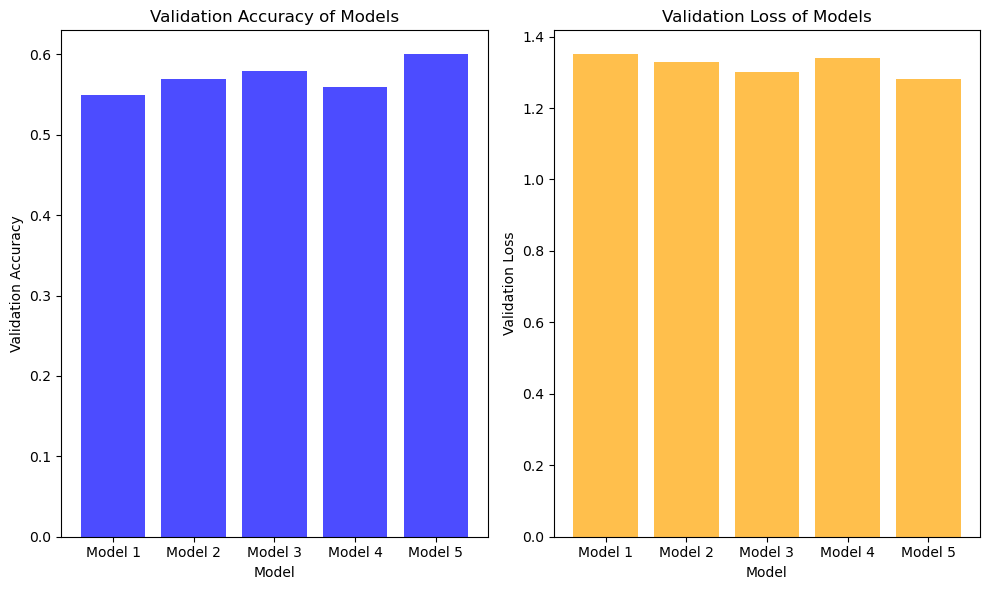

In [26]:
from matplotlib import pyplot as plt
# Now, let's plot the results
plt.figure(figsize=(10, 6))

# Plotting the validation accuracy of each model
plt.subplot(1, 2, 1)
plt.bar(results_df['model'], results_df['val_accuracy'], color='blue', alpha=0.7)
plt.title('Validation Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')

# Plotting the validation loss of each model
plt.subplot(1, 2, 2)
plt.bar(results_df['model'], results_df['val_loss'], color='orange', alpha=0.7)
plt.title('Validation Loss of Models')
plt.xlabel('Model')
plt.ylabel('Validation Loss')

plt.tight_layout()
plt.show()

Model 5 seems to be the most promising model for this particular dataset, closely followed by Model 2. The results suggest that incorporating convolutional layers (as in Model 5) could be beneficial for this time series classification task. However, it's important to note that validation results are only indicative, and the true test of performance will be on the unseen test data.

## Model Architecture
- The models were designed with different combinations of LSTM, GRU, and Conv1D layers to capture the temporal dependencies within the time series data effectively.
- Bidirectional LSTMs were used in one of the models to process the time series data both forwards and backwards, potentially capturing additional patterns that a unidirectional LSTM might miss.
- Conv1D layers were included in one model to extract features from the time-series data across the time steps before passing them to the LSTM layers, following the intuition that convolutional filters can identify local patterns within the time steps.
- Dropout layers were included to prevent overfitting by introducing some level of noise to the training process, thereby forcing the network to learn more robust features.
- Batch normalization layers were included in the GRU-based model to standardize the inputs to the next layer, potentially speeding up training and achieving better performance.

## Training Process
- A standard `adam` optimizer was chosen for its adaptive learning rate properties, which can lead to quicker convergence.
- We used `sparse_categorical_crossentropy` as our loss function, as our target labels are integer-encoded, and this function expects integers as the targets.
- A validation split of 20% was used during training to monitor the model's performance on unseen data and prevent overfitting.
- The number of epochs was set conservatively to avoid overfitting, with the understanding that this parameter might need adjustment based on the validation performance.
- Models were trained with a batch size of 64, balancing the trade-off between memory consumption and the benefits of vectorization.

## Other Considerations
- Normalization was applied as a layer within the model itself to ensure consistent application of this preprocessing step during both training and inference.
- The number of filters and kernel sizes in Conv1D layers were carefully chosen to ensure the model has enough capacity to learn from the data without reducing the temporal resolution too much after pooling operations.
